In [1]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

<function matplotlib.pyplot.show(*args, **kw)>

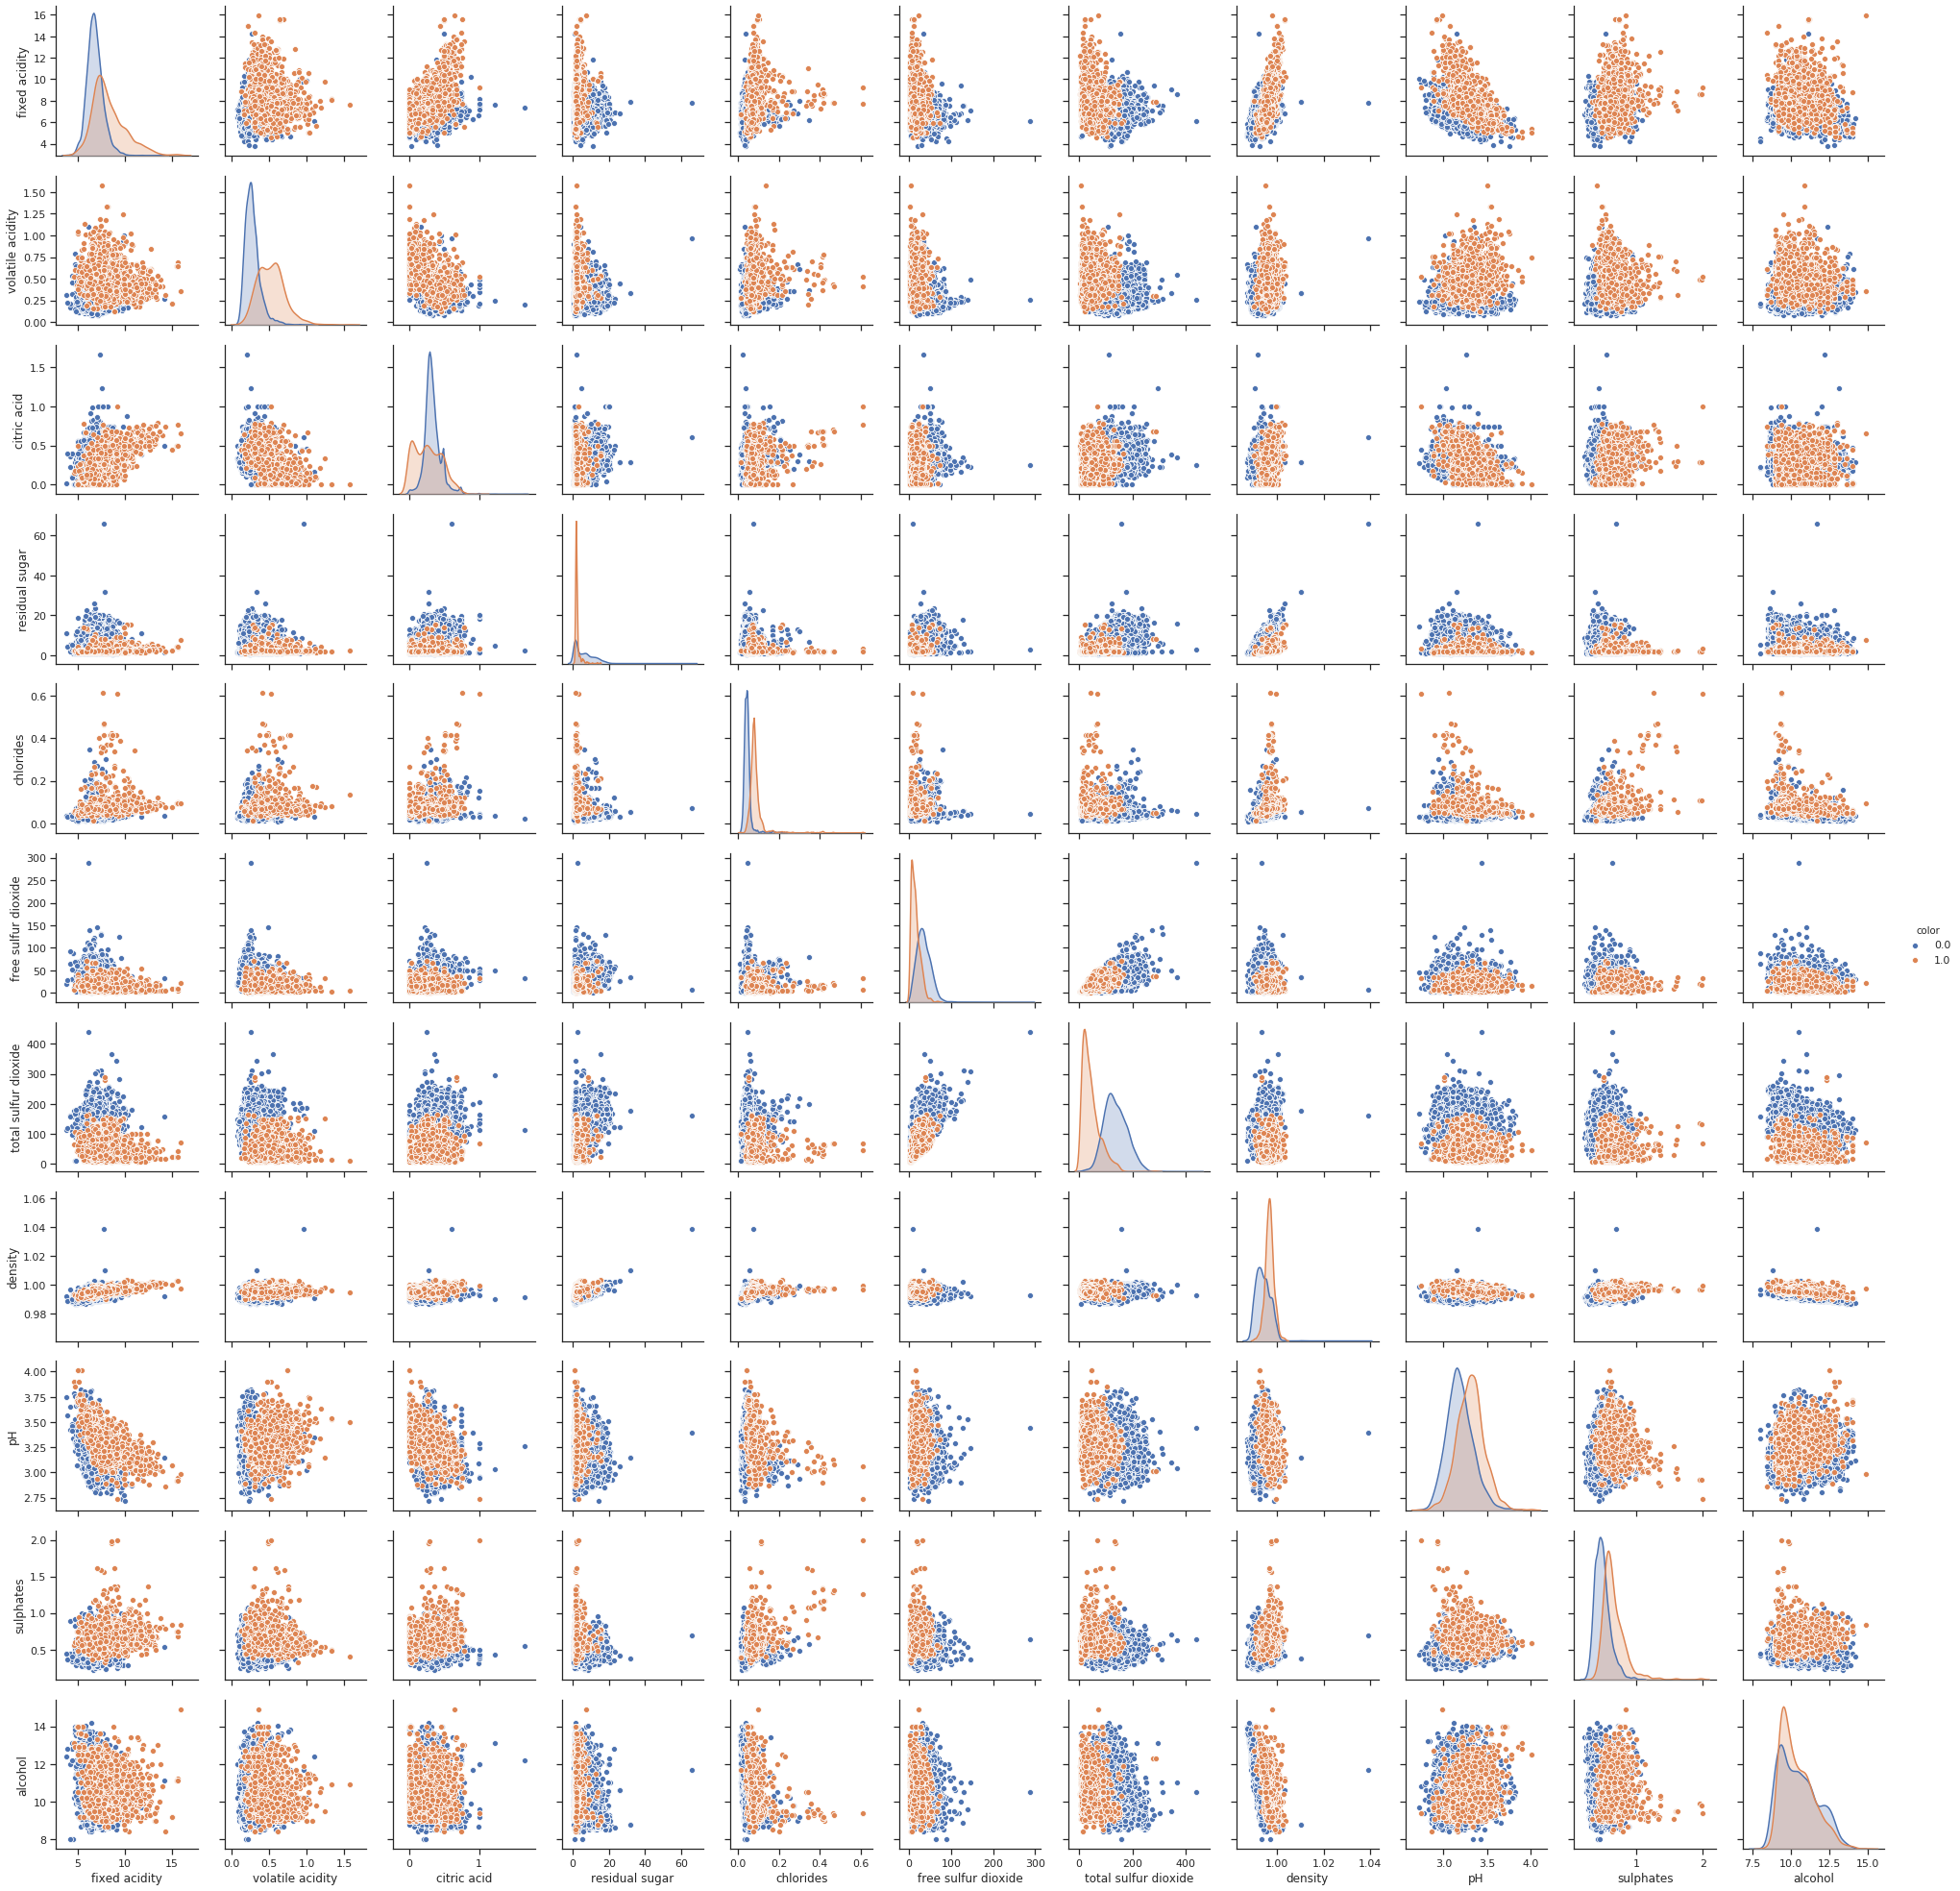

In [3]:
#pairplot of unnormalized data
sns.pairplot(wine,vars=D, hue=C)
plt.show

In [4]:
from sklearn.preprocessing import StandardScaler
X = wine[D]
X = StandardScaler().fit_transform(X)
df = pd.DataFrame(X)
df['color']=wine['color'].values
df['color']= 'wine' + df.color.astype(str)

<function matplotlib.pyplot.show(*args, **kw)>

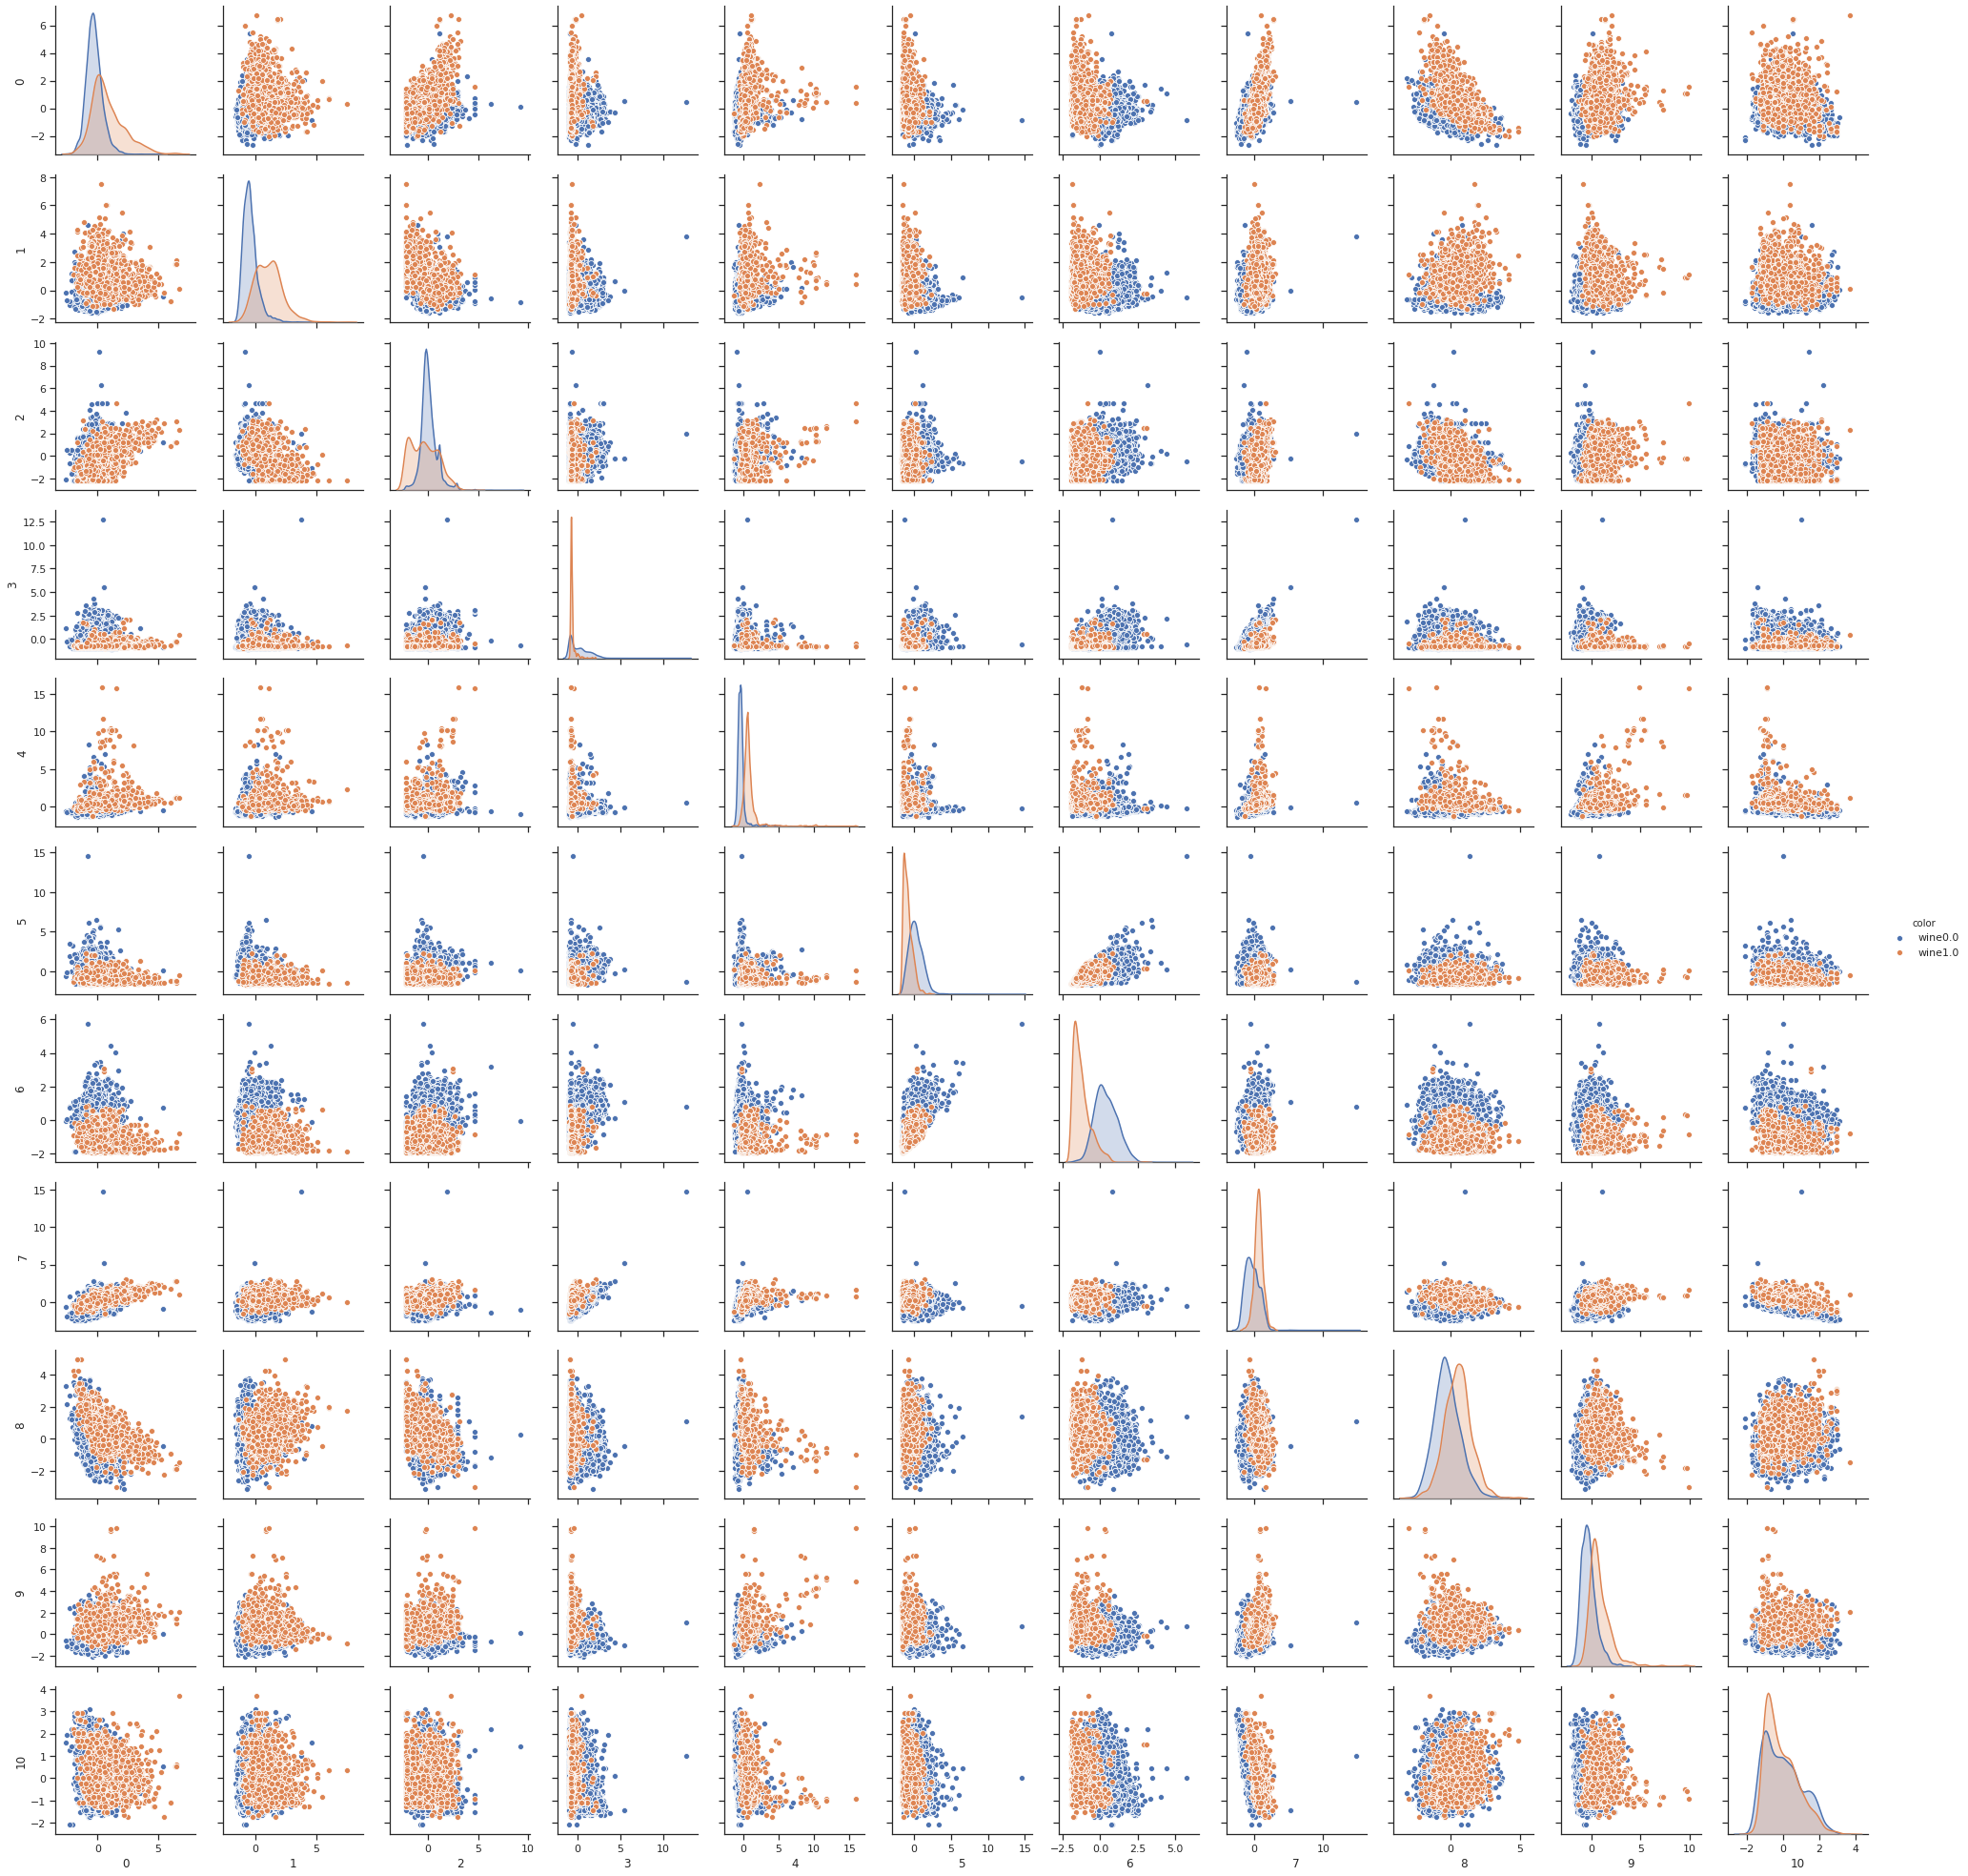

In [5]:
#pairplot of normalized data
sns.pairplot(df, hue='color')
plt.show

The changes in the data can only be seen in the scales of the graphs. The data was centered around 0 and the variance fixed across all dimensions.

e.g. fixed acidity went up to 16 but in the second paiplot it only goes up to 6.

Normalization is necessary to apply PCA in order to find vectors with data centered on 0.

In [6]:
# split data
y = np.ravel(wine[[C]])
ran = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = ran) 

In [7]:
n_neighborslist = list(range(1,51))
col_names=['uniform','manhattan','euclidean']
accarray = np.zeros((len(n_neighborslist),3))

In [8]:
#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray, columns=col_names)
acc = acc.drop([0])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.uniform[k] = accscore

In [9]:
#MANHATTAN

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.manhattan[k] = accscore

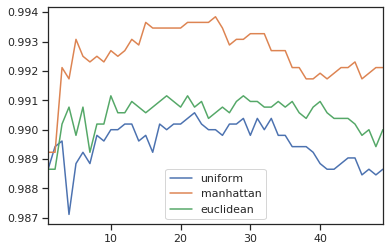

In [10]:
#EUCLIDEAN

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.euclidean[k] = accscore
acc.plot.line()

We can see here that manhattan gives the best accuracies. I tried chebyshev and minkowski metric but they gave worse accuracies.

I tried getting good accuracies with 4 features which I chose from the gaussians with less overlap between them.

In [11]:
# classify color with 4 selected features based on separation from pairplots
Xselected = X[:,[1,4,6,9]]
y = np.ravel(wine[[C]])
ran = 42
X_train, X_test, y_train, y_test = train_test_split(Xselected, y, test_size=0.8, random_state = ran) 

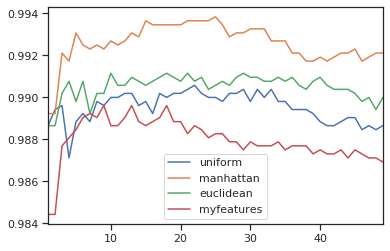

In [12]:
acc['myfeatures'] = acc['uniform']

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.myfeatures[k] = accscore
acc.plot.line()

.988 was the best accuracy i could get with 4 features which only defeated uniform when having less than 10 neighbors. Good enough for only 4 features.

PCA on color:

In [13]:
# Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
# fit on data
xpca = pca.fit_transform(X)
y = np.ravel(wine[[C]])
ran = 42
X_train, X_test, y_train, y_test = train_test_split(xpca, y, test_size=0.8, random_state = ran) 

In [14]:
acc['pcauniform'] = acc['uniform']

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.pcauniform[k] = accscore

In [15]:
#MANHATTAN
acc['pcamanhattan'] = acc['uniform']
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.pcamanhattan[k] = accscore

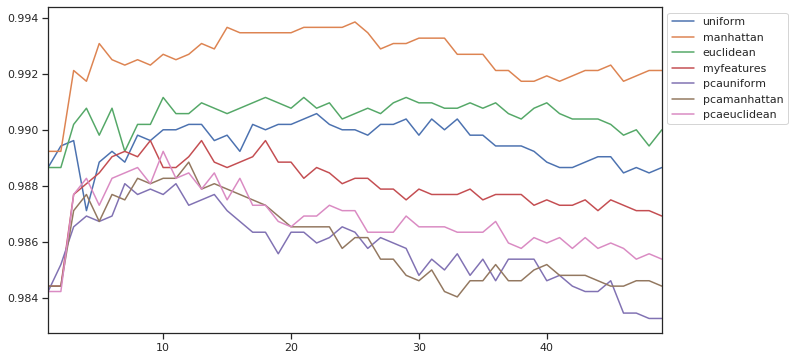

In [16]:
#EUCLIDEAN
acc['pcaeuclidean'] = acc['uniform']
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.pcaeuclidean[k] = accscore
acc.plot.line(figsize=(11,6)).legend(bbox_to_anchor=(1, 1))

PCA gave worse results than any of the previous tests. Euclidean distance worked the best within the PCA metrics.

LDA on color:

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
y = np.ravel(wine[[C]])
lda = LDA()
xlda = pd.DataFrame(lda.fit_transform(X, y))
ran = 42
X_train, X_test, y_train, y_test = train_test_split(xlda, y, test_size=0.8, random_state = ran) 

In [18]:
acc['lda_uniform'] = acc['pcauniform']

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.lda_uniform[k] = accscore

In [19]:
#MANHATTAN
acc['lda_manhattan'] = acc['pcauniform']
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.lda_manhattan[k] = accscore

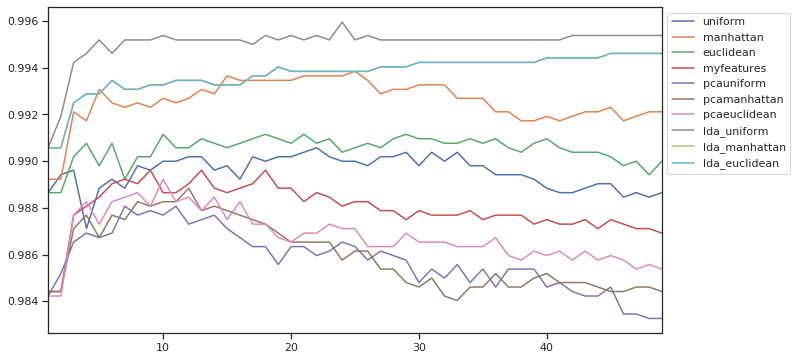

In [20]:
#EUCLIDEAN
acc['lda_euclidean'] = acc['pcauniform']
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.lda_euclidean[k] = accscore
acc.plot.line(figsize=(11,6)).legend(bbox_to_anchor=(1, 1))

LDA worked significantly better than PCA which is obvious since LDA increases distances between classes and decreases the distance within each class which works perfectly for KNN to classify data.

LDA Manhattan and Euclidean gave the same result since LDA only provides n-1 axis where n are the classes which there are only 2 (red and white wine) so 2-1=1 LDA only has 1 axis when fitting it for color the different methods to calculate distance make no difference in 1 dimension.

KNN with LDA and uniform weights gave the best accuracy for all the range of neighbors.

In conclusion applying LDA before doing a distance classification method like knn is really usefull.

Quality in 2 axis:

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
ylda = np.ravel(wine[[L]])
lda = LDA()
xlda = pd.DataFrame(lda.fit_transform(X, ylda))

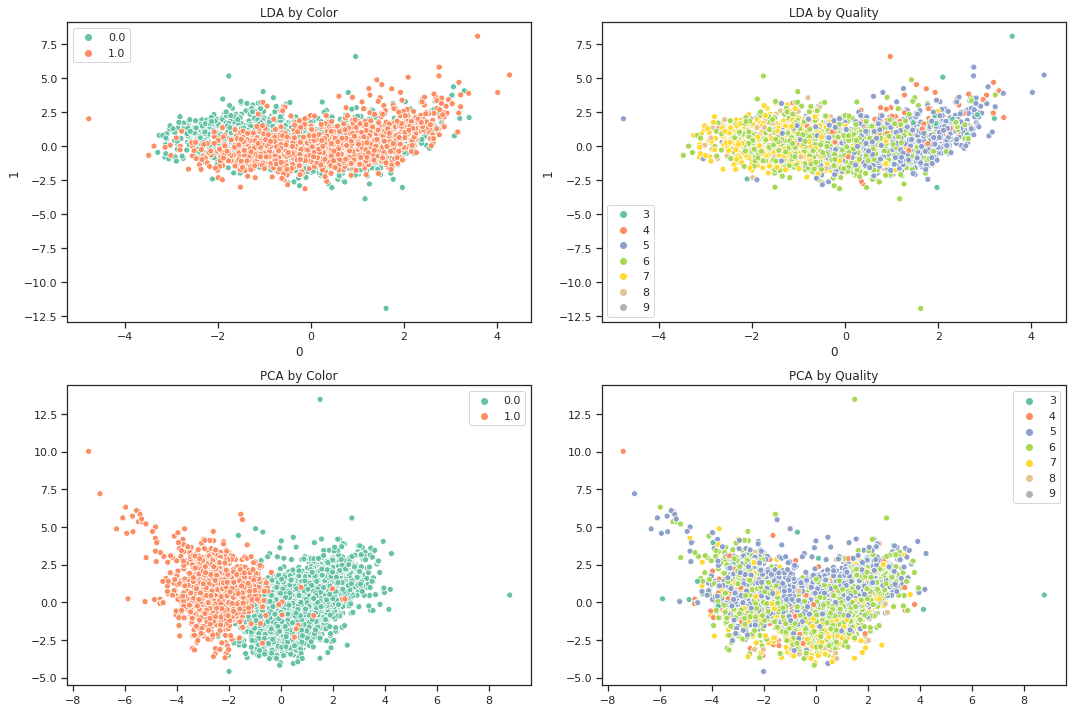

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
sns.scatterplot(x=xlda[0], y=xlda[1], hue=y, palette="Set2", ax=ax[0,0], legend="full").title.set_text("LDA by Color")
sns.scatterplot(x=xpca[:,0], y=xpca[:,1], hue=y, palette="Set2", ax=ax[1,0], legend="full").title.set_text("PCA by Color")
sns.scatterplot(x=xlda[0], y=xlda[1], hue=ylda, palette="Set2", ax=ax[0,1], legend="full").title.set_text("LDA by Quality")
sns.scatterplot(x=xpca[:,0], y=xpca[:,1], hue=ylda, palette="Set2", ax=ax[1,1], legend="full").title.set_text("PCA by Quality")
fig.tight_layout()
plt.show()

Color:

PCA is not a classification method so it wont give that much information, specially showing only 2 components. But in any case it did a good job at separating the wine by color.

LDA by color doesnt make any sense since we performed LDA on quality. LDA for color only gives 1 dimension.



Quality:

LDA did a pretty good job separating the quality if you take into acount that quality is a very subjective label. But we can see the higher values on the right and lower values on the left part of the plot.

Even though PCA did not have any knowledge of the classes, it does have some separation specially in 5, 6 and 7 which are the most abundant classes in the dataset.